In [1]:
# Import all the important libraries
import numpy as np
import numba as nb 
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib

%matplotlib inline
from ipywidgets import interact

from sys_pde_no_growth_no_Lmx1a import *

In [2]:
# System Params - Same for all the species
sys_params = np.zeros(2)
sys_params[0] = 2                # Hill coefficient
sys_params[1] = 0.7              # BMP(t=0)

# BMP
b_params = np.zeros(4)
b_params[0] = 0.01                  # D_b
b_params[1] = 0.01                  # a_b_s
b_params[2] = 100**sys_params[0]  # K_b_s (with exponent)
b_params[3] = 0.11                  # d_b

# BMP i
i_params = np.zeros(4)
i_params[0] = 0.18                   # D_i
i_params[1] = 9.906                  # a_i_s
i_params[2] = 0.1**sys_params[0]   # K_i_s
i_params[3] = 0.034                 # d_i

# pSmad
s_params = np.zeros(4)
s_params[0] = 2.81                  # a_s_b
s_params[1] = 10**sys_params[0]   # K_s_b
s_params[2] = 62.35**sys_params[0]   # K_s_i
s_params[3] = 1.44                   # d_s

In [3]:
# Define all the simulations params
sol_params = np.zeros(10)
sol_params[0] = 0.05 # dt 
sol_params[1] = 1 # dx
sol_params[2] = 250/sol_params[1] #Lx
sol_params[3] = 250/sol_params[1] #Ly
sol_params[4] = 100/sol_params[1] # Radius of cell colony
sol_params[5] = 144/sol_params[0] # Total time, T
sol_params[6] = 1/sol_params[0] # Delta t (snapshot saving time)
sol_params[7] = 8/sol_params[0] # Cell Colony starts growing then (early migratory cells)
sol_params[8] = 0.25*sol_params[0] # Cell colony growth rate

In [4]:
# Get the initial conditions
array_b, array_i, array_s = create_IC_1(sys_params, sol_params)

In [5]:
data_b_time, data_i_time, data_s_time = run_and_save_sys(array_b, array_i, array_s, 
                                                         b_params, i_params, s_params,
                                                         sys_params, sol_params)

In [6]:
Lx, Ly = int(sol_params[2]), int(sol_params[3])
X_indices = np.repeat(np.arange(Lx), repeats=Ly).reshape((Lx, Ly))
Y_indices = X_indices.copy().T

In [7]:
Lx, Ly = int(sol_params[2]), int(sol_params[3])
R = int(sol_params[4])
Tlen = sol_params[5]/sol_params[6]

T_points = np.array([0, 6, 8, 12, 16, 24, 48])
cmap_vals = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

norm = matplotlib.colors.Normalize(vmin=0, vmax=1) 
cmap1 = plt.cm.Blues
cmap2 = plt.cm.Greens
cmap3 = plt.cm.Purples
cmap4 = plt.cm.Reds
cmap5 = plt.cm.Oranges

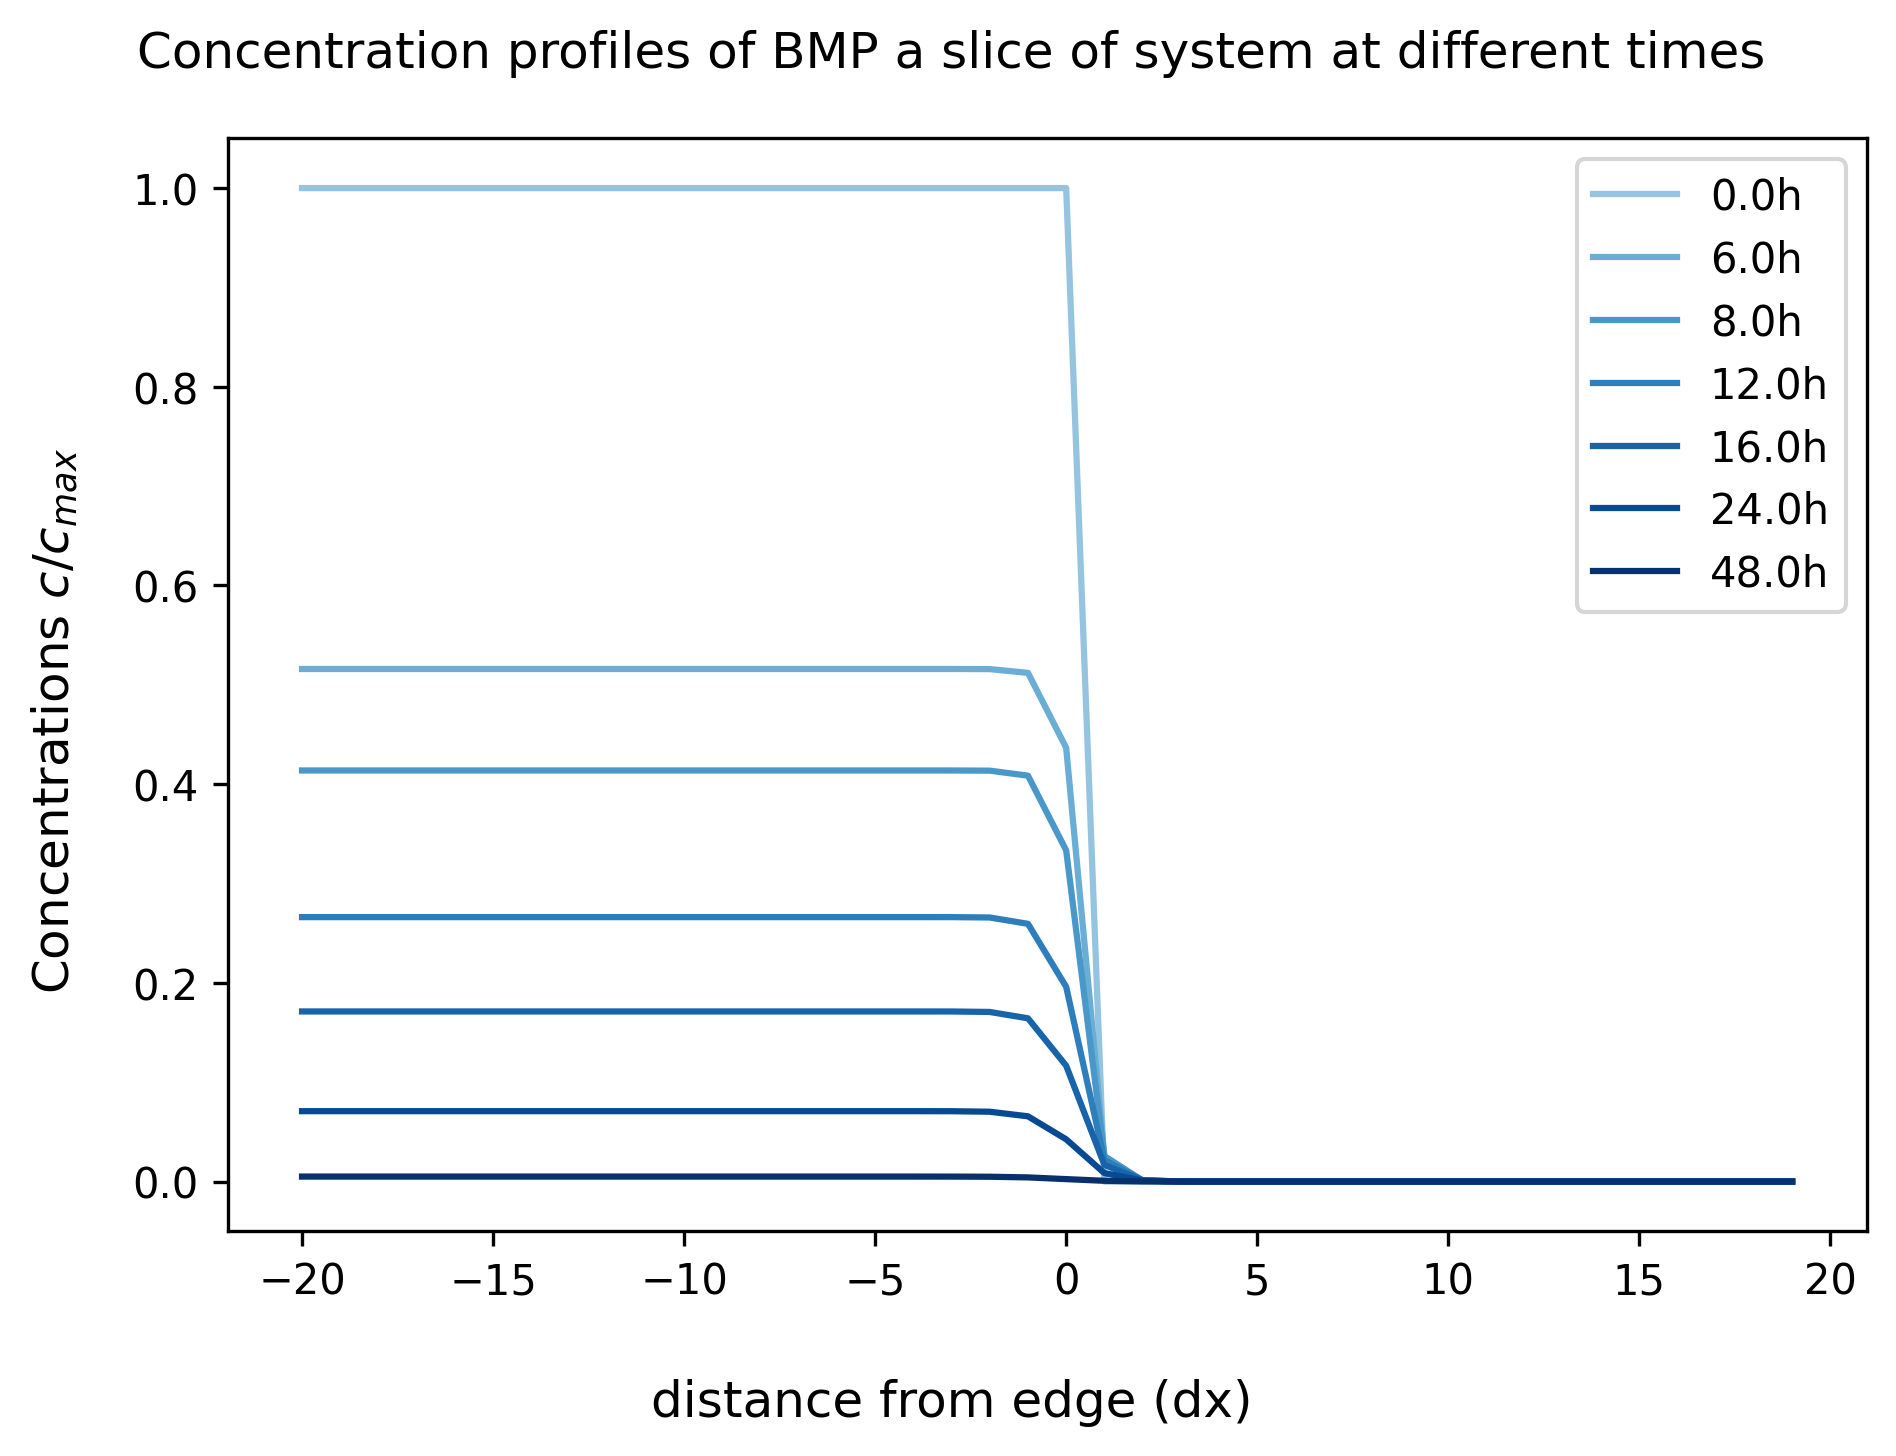

In [8]:
# Plot BMP dynamics
fig, axes = plt.subplots(1, 1, dpi=300)

for i, t in enumerate(T_points):
    b_concs_slice_x = data_b_time[t][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_b_time)


    axes.plot(np.arange(40) - 20, b_concs_slice_x, color = cmap1(norm(cmap_vals[i]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*t))

axes.legend()
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('distance from edge (dx)')
plt.suptitle("Concentration profiles of BMP a slice of system at different times")
fig.tight_layout();

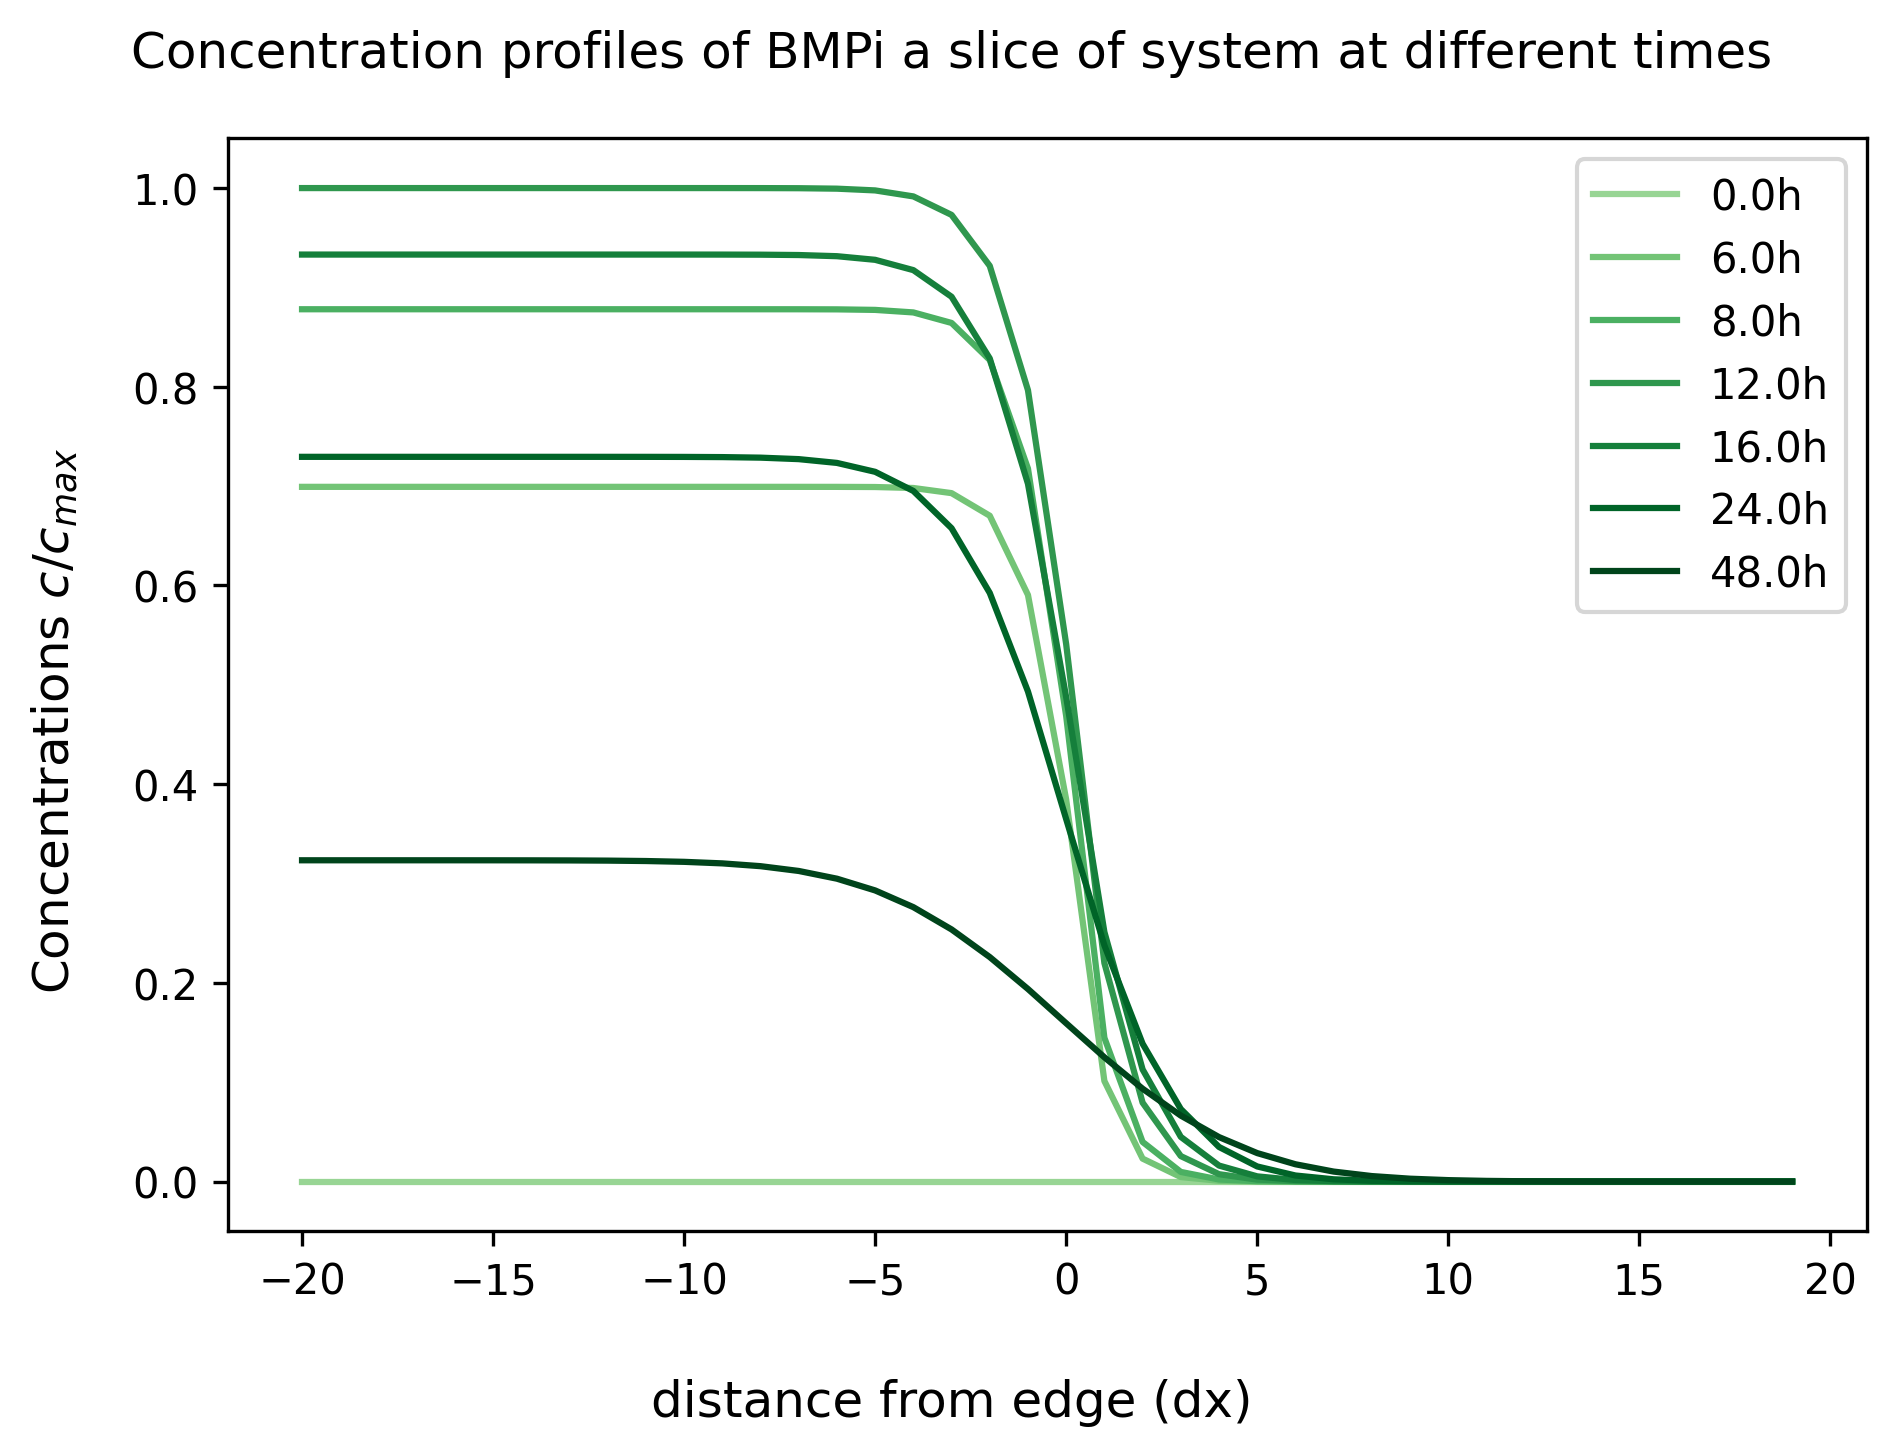

In [9]:
# Plot BMPi dynamics
fig, axes = plt.subplots(1, 1, dpi=300)

for i, t in enumerate(T_points):
    i_concs_slice_x = data_i_time[t][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_i_time)


    axes.plot(np.arange(40) - 20, i_concs_slice_x, color = cmap2(norm(cmap_vals[i]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*t))

axes.legend()
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('distance from edge (dx)')
plt.suptitle("Concentration profiles of BMPi a slice of system at different times")
fig.tight_layout();

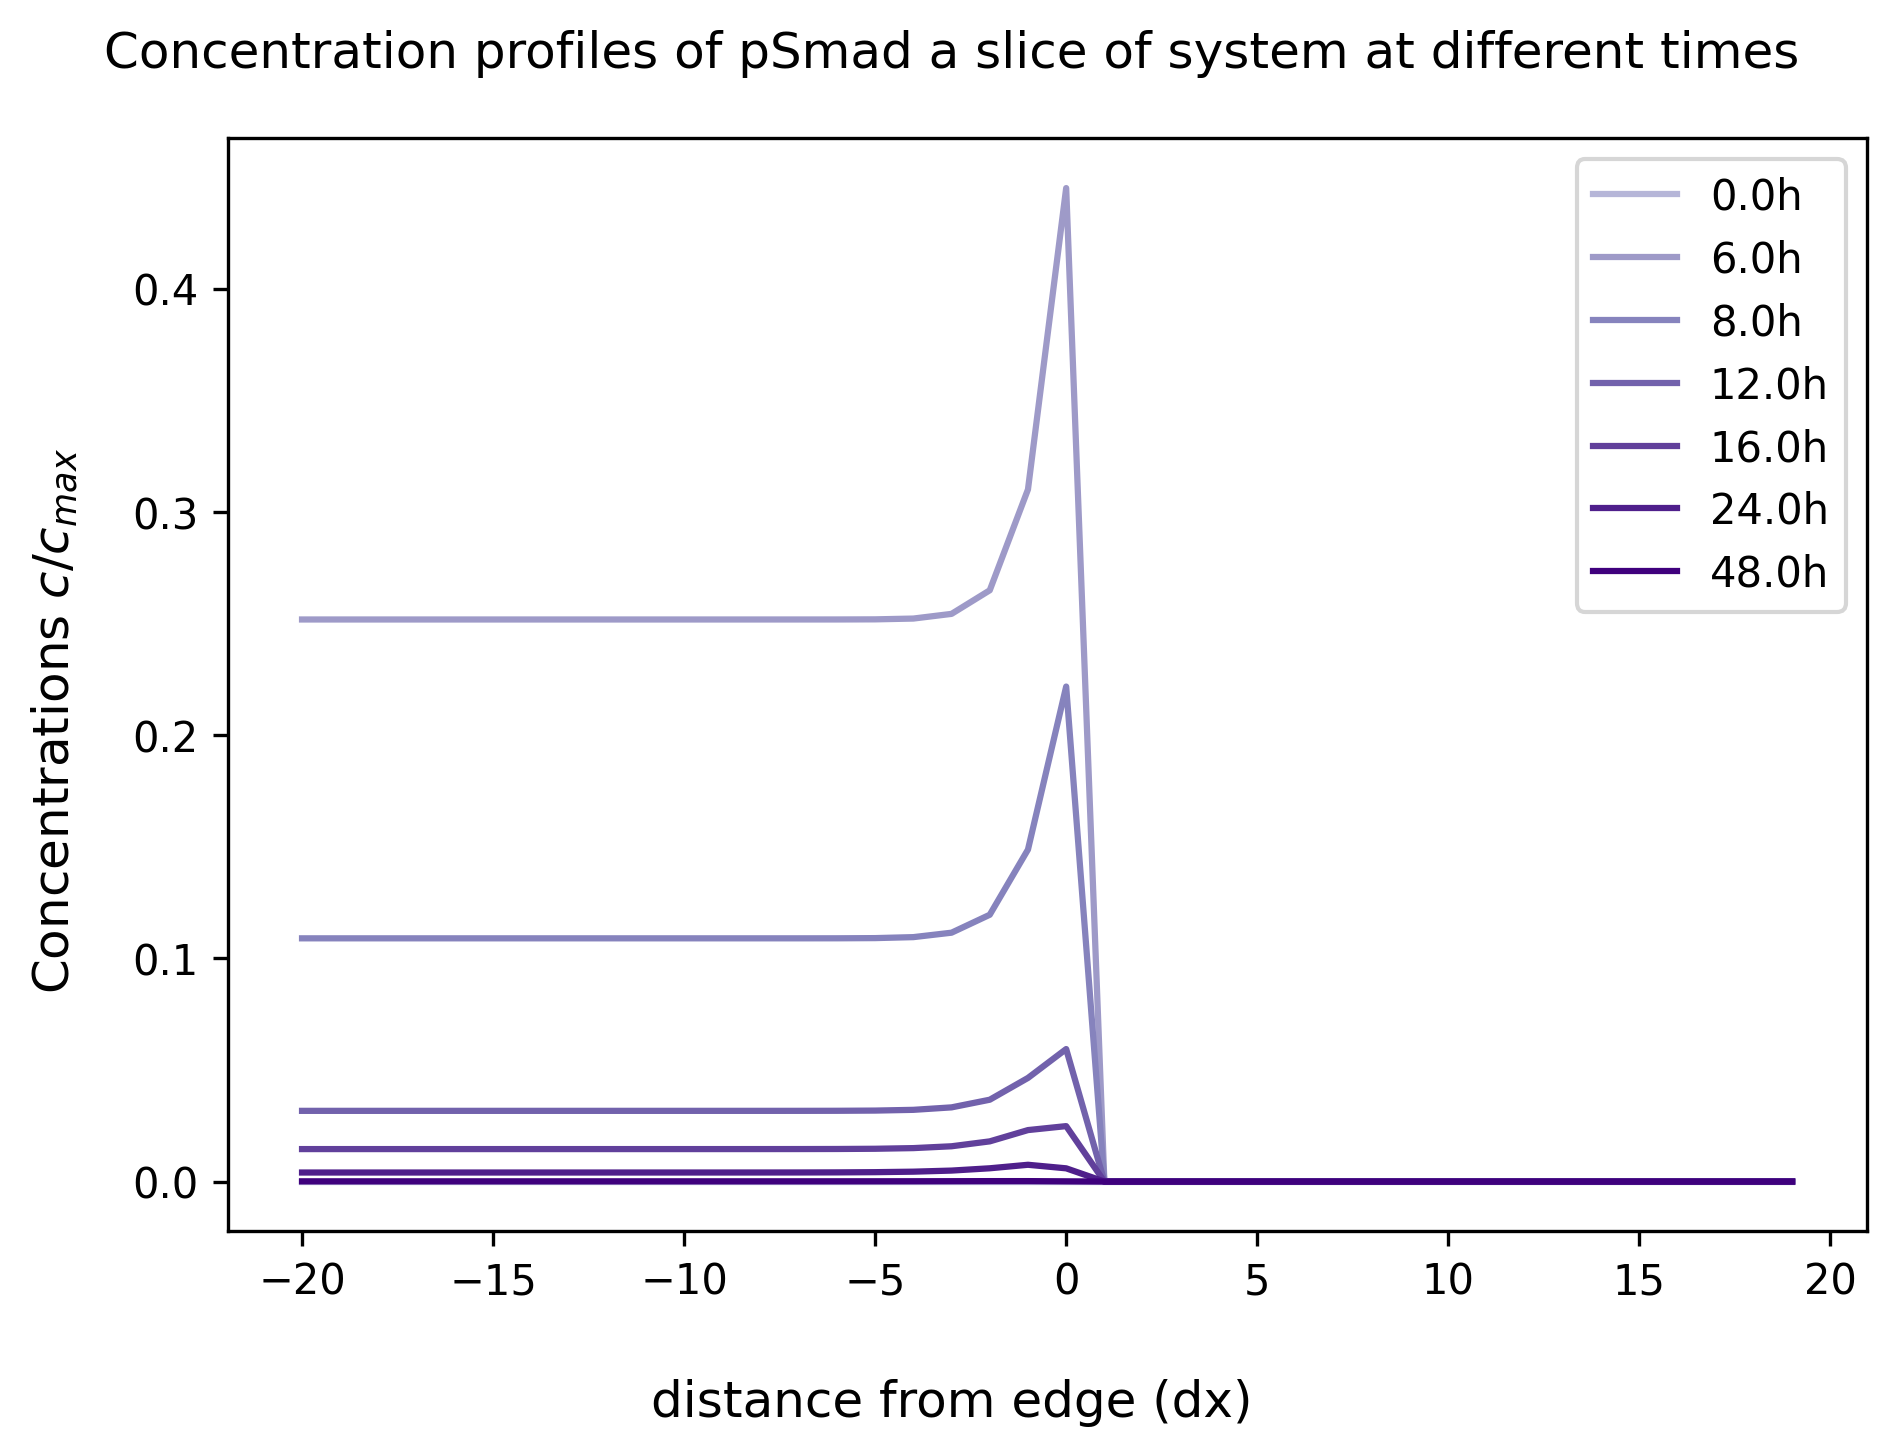

In [10]:
# Plot pSmad dynamics
fig, axes = plt.subplots(1, 1, dpi=300)

for i, t in enumerate(T_points):
    s_concs_slice_x = data_s_time[t][(Lx//2+R-20):(Lx//2+R+20), Ly//2]/np.max(data_s_time)


    axes.plot(np.arange(40) - 20, s_concs_slice_x, color = cmap3(norm(cmap_vals[i]))
                   , label="{}h".format(sol_params[6]*sol_params[0]*t))

axes.legend()
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('distance from edge (dx)')
plt.suptitle("Concentration profiles of pSmad a slice of system at different times")
fig.tight_layout();

In [16]:
# Experimental results
t_measured = np.array([ 0,   0.5,  0.75, 1.0,   2.0,  3.0,  4.0,  5.0,  6.0,  7.,   8.0,  24.0,  48.0,  56.0,  64.0,  67.0,  70.0,  72.0,  80.0,  96.0,  110,   126,   132,   144])
x2_measured = np.array([0.0, 0.68, 0.77, 1.283, 1.12, 1.84, 1.37, 1.29, 1.80, 1.03, 0.96, 0.012, 0.12,  0.40,  0.60,  0.7,   0.80,  0.90,  0.95,  1.00,  1.00,  1.00,  1.00,  1.00])
x3_measured = np.array([0,   0.0,  0.0,  0.0,   0.0,  0.0,  0.0,  0.0,  0.0,  0.,   0.0,  0.0,   48.0,  56.0,  64.0,  67.0,  70.0,  72.0,  80.0,  96.0,  96.0,  96.0,  96.0,  96.0])
x2_measured /= np.max(x2_measured)
x3_measured /= np.max(x3_measured)

In [17]:
Lx, Ly = int(sol_params[2]), int(sol_params[3])
R = int(sol_params[4])
b_concs_slice_t = data_b_time[:, Lx//2+R, Ly//2]/np.max(data_b_time)
i_concs_slice_t = data_i_time[:, Lx//2+R, Ly//2]/np.max(data_i_time)
s_concs_slice_t = data_s_time[:, Lx//2+R, Ly//2]/np.max(data_s_time)

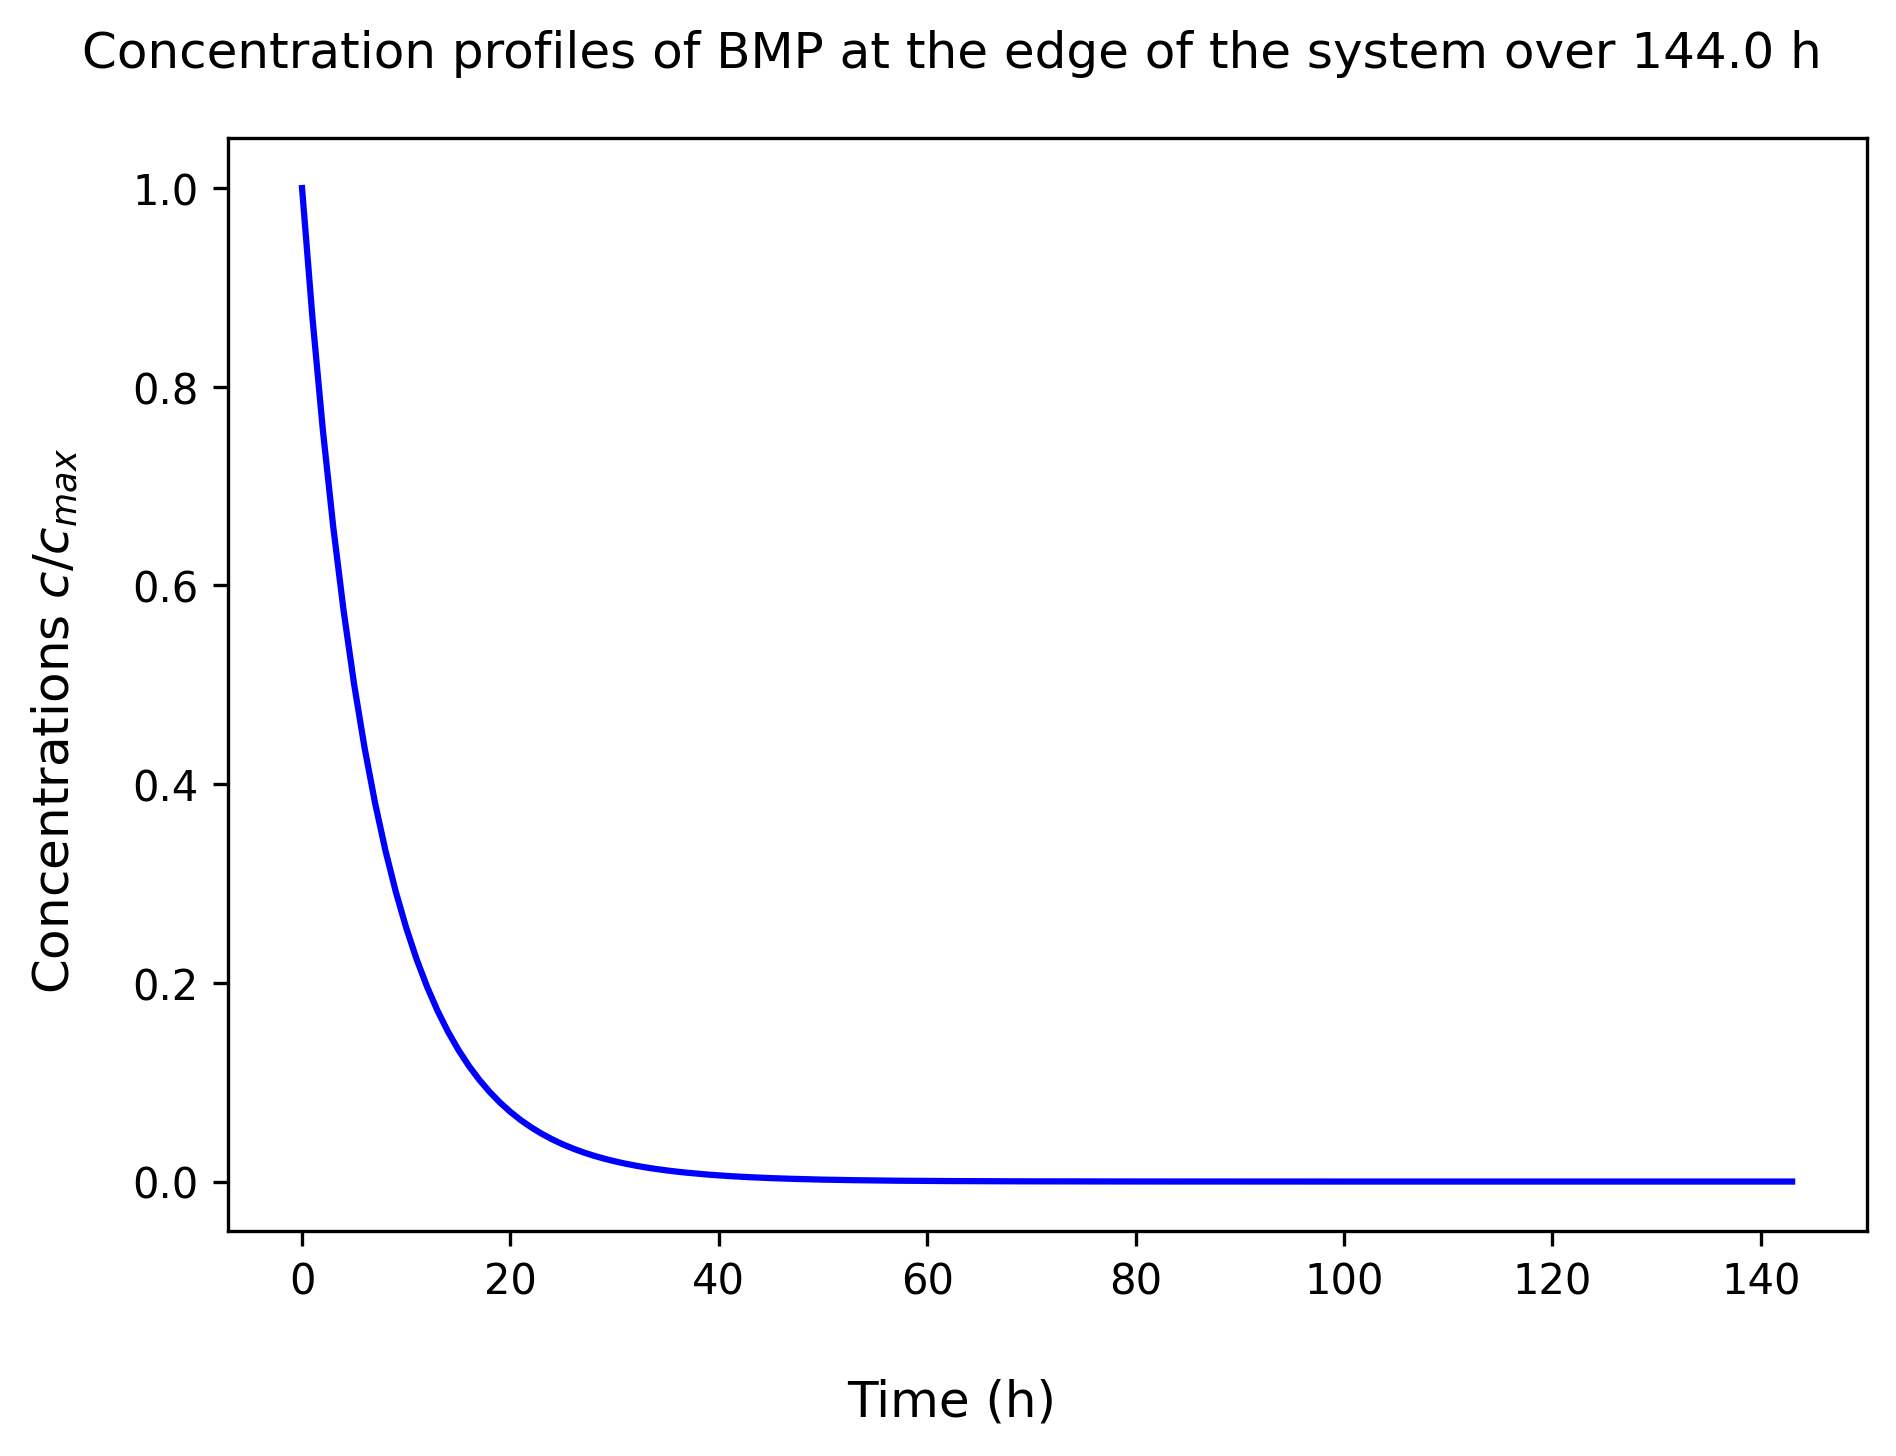

In [18]:
# Plot BMP dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_b_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], b_concs_slice_t, color = "Blue")

fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of BMP at the edge of the system over {} h".format(sol_params[5]*sol_params[0]))
fig.tight_layout();

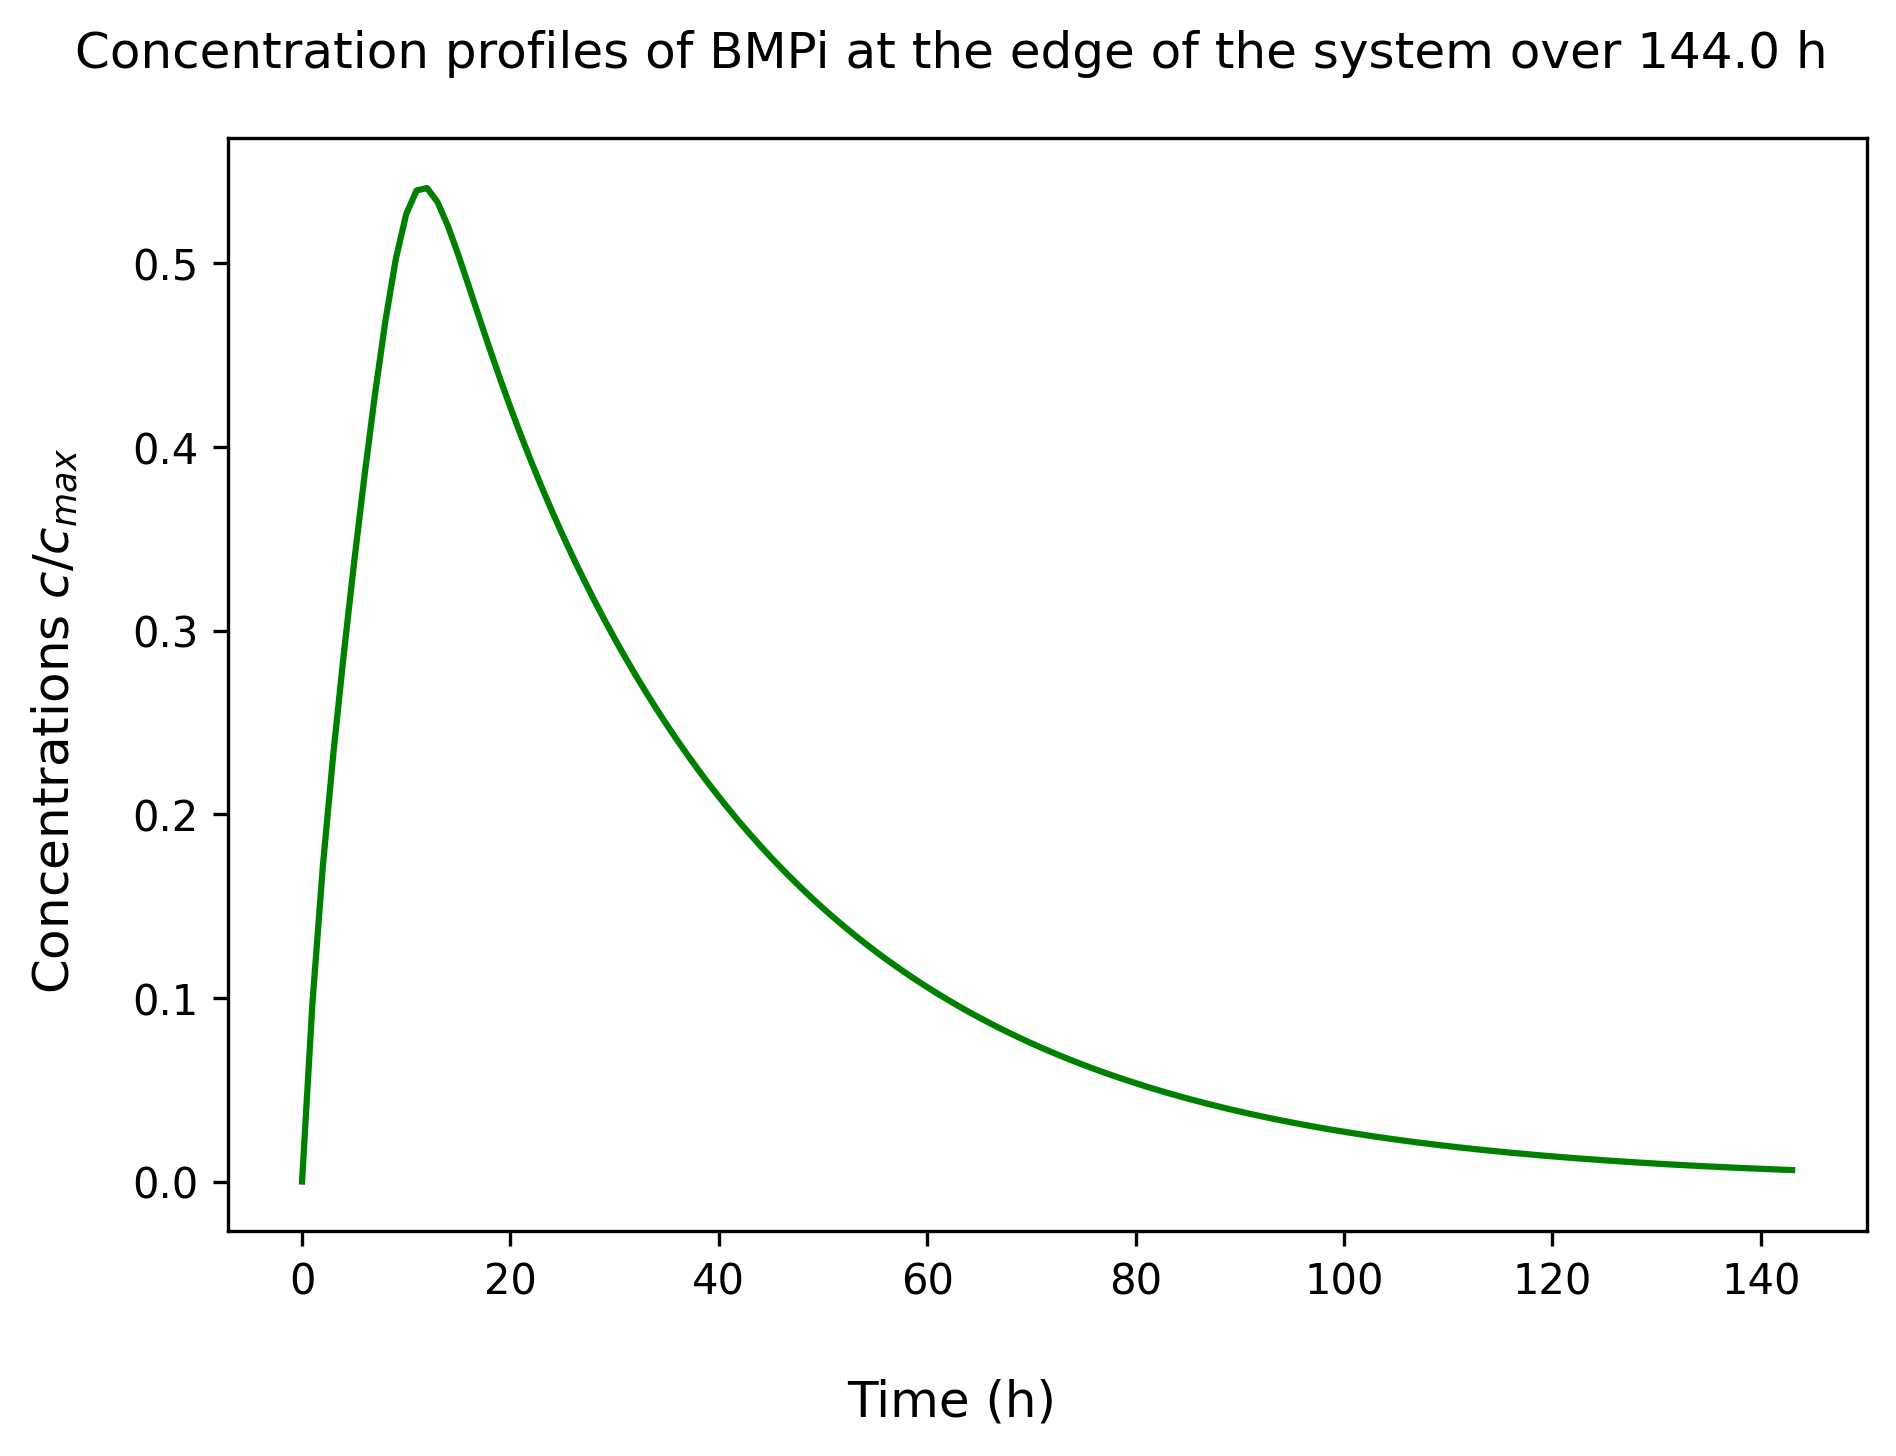

In [19]:
# Plot BMPi dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_b_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], i_concs_slice_t, color = "Green")

fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of BMPi at the edge of the system over {} h".format(sol_params[5]*sol_params[0]))
fig.tight_layout();

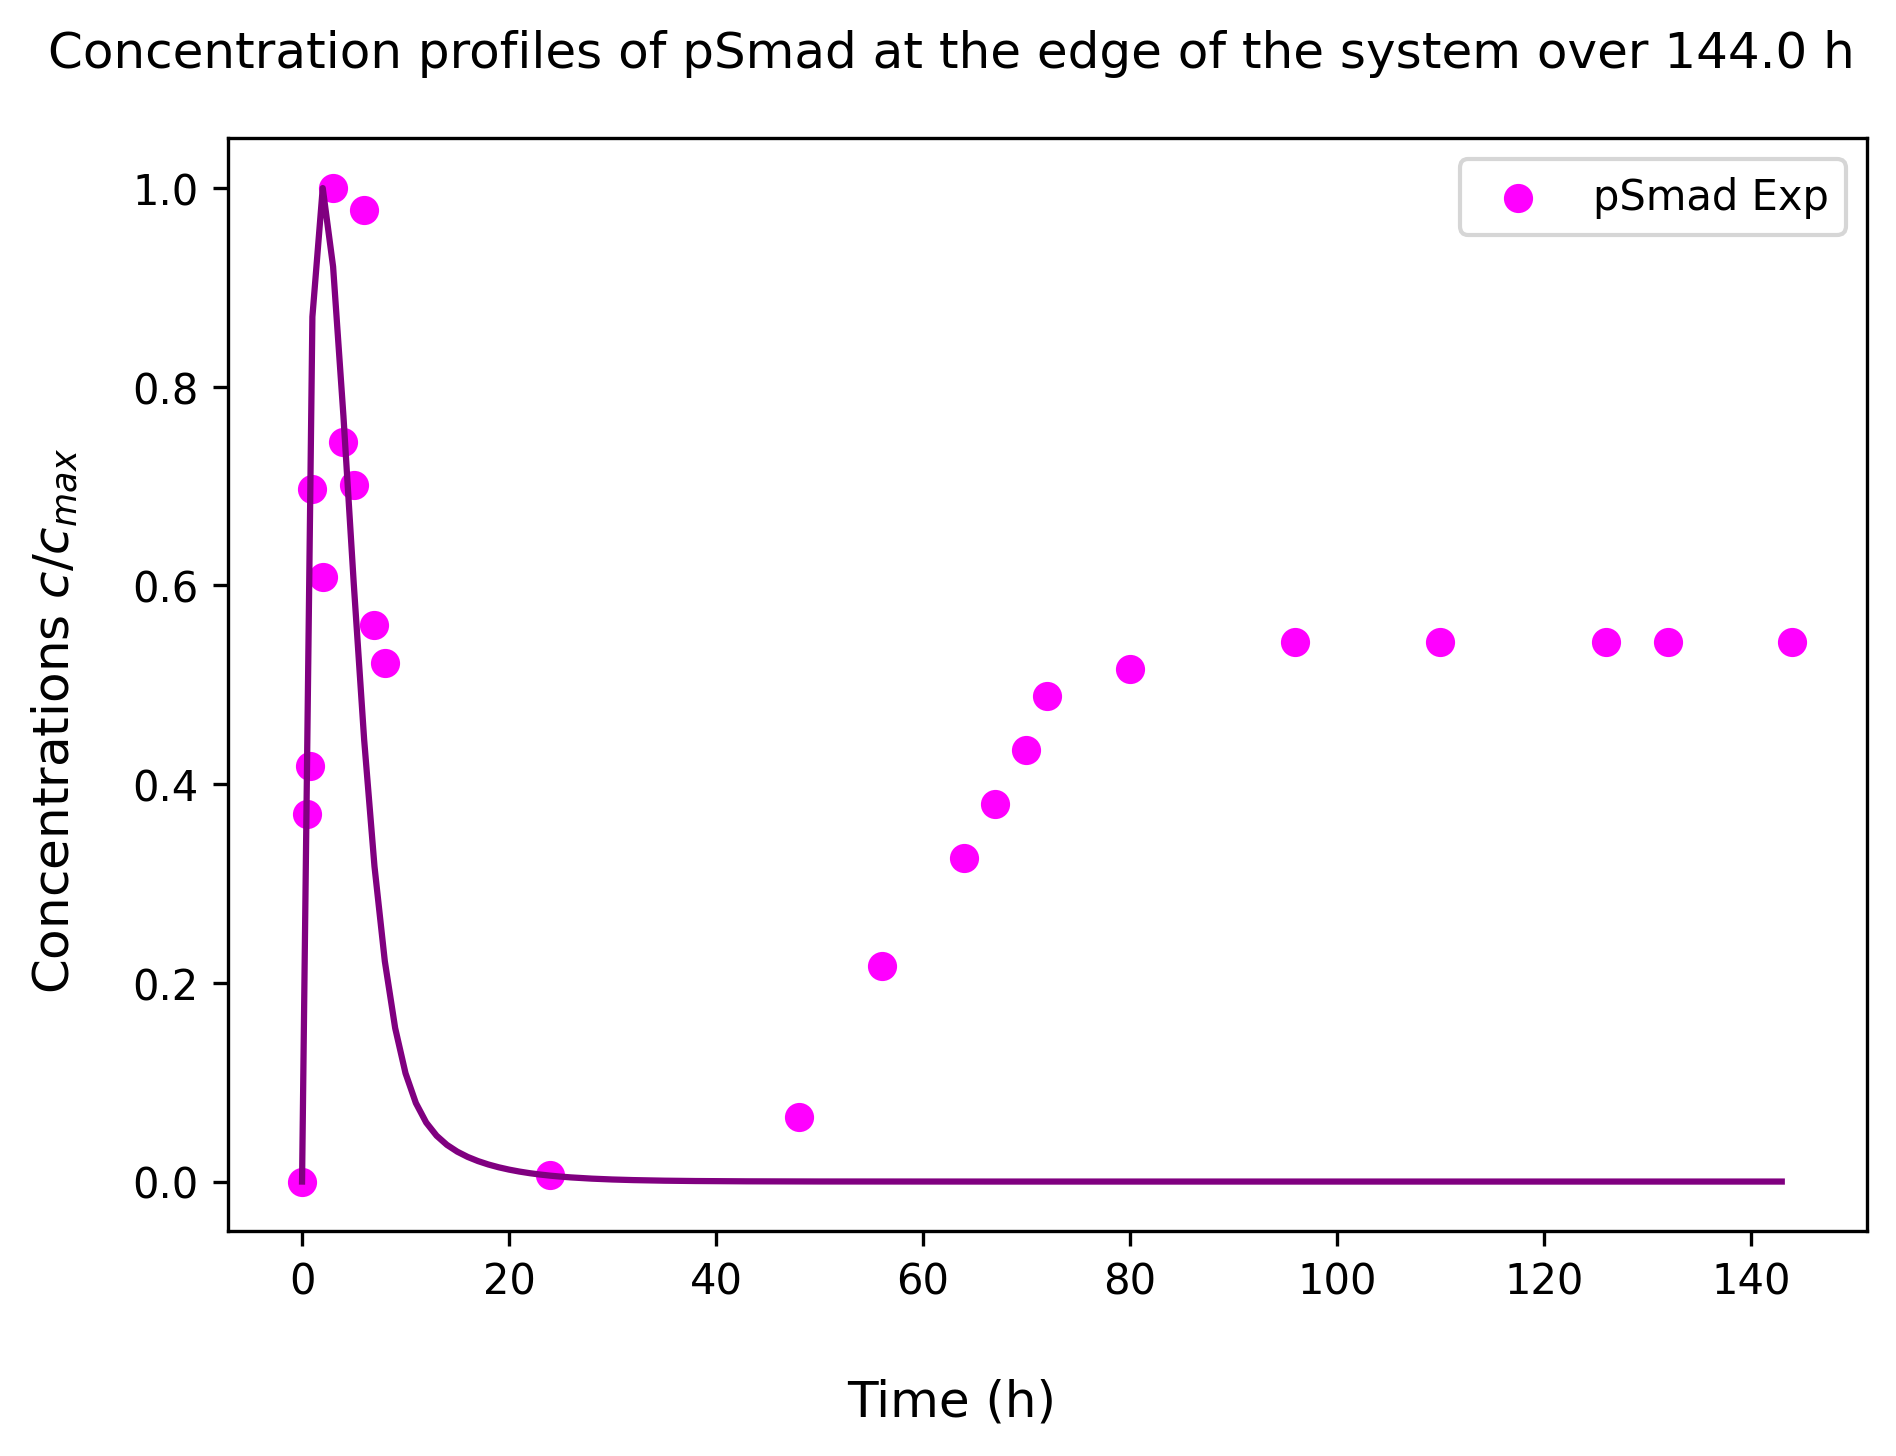

In [20]:
# Plot pSmad dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_b_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[6], s_concs_slice_t, color = "Purple")
axes.scatter(t_measured, x2_measured, color = "magenta", label="pSmad Exp")

plt.legend()
fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of pSmad at the edge of the system over {} h".format(sol_params[5]*sol_params[0]))
fig.tight_layout();

FileNotFoundError: [Errno 2] No such file or directory: '/home/ugubbala/Documents/Rotations/NeuralTubeGrowth/Python_checkpoint_1/NoGrowth/time_snaps/0.jpeg'

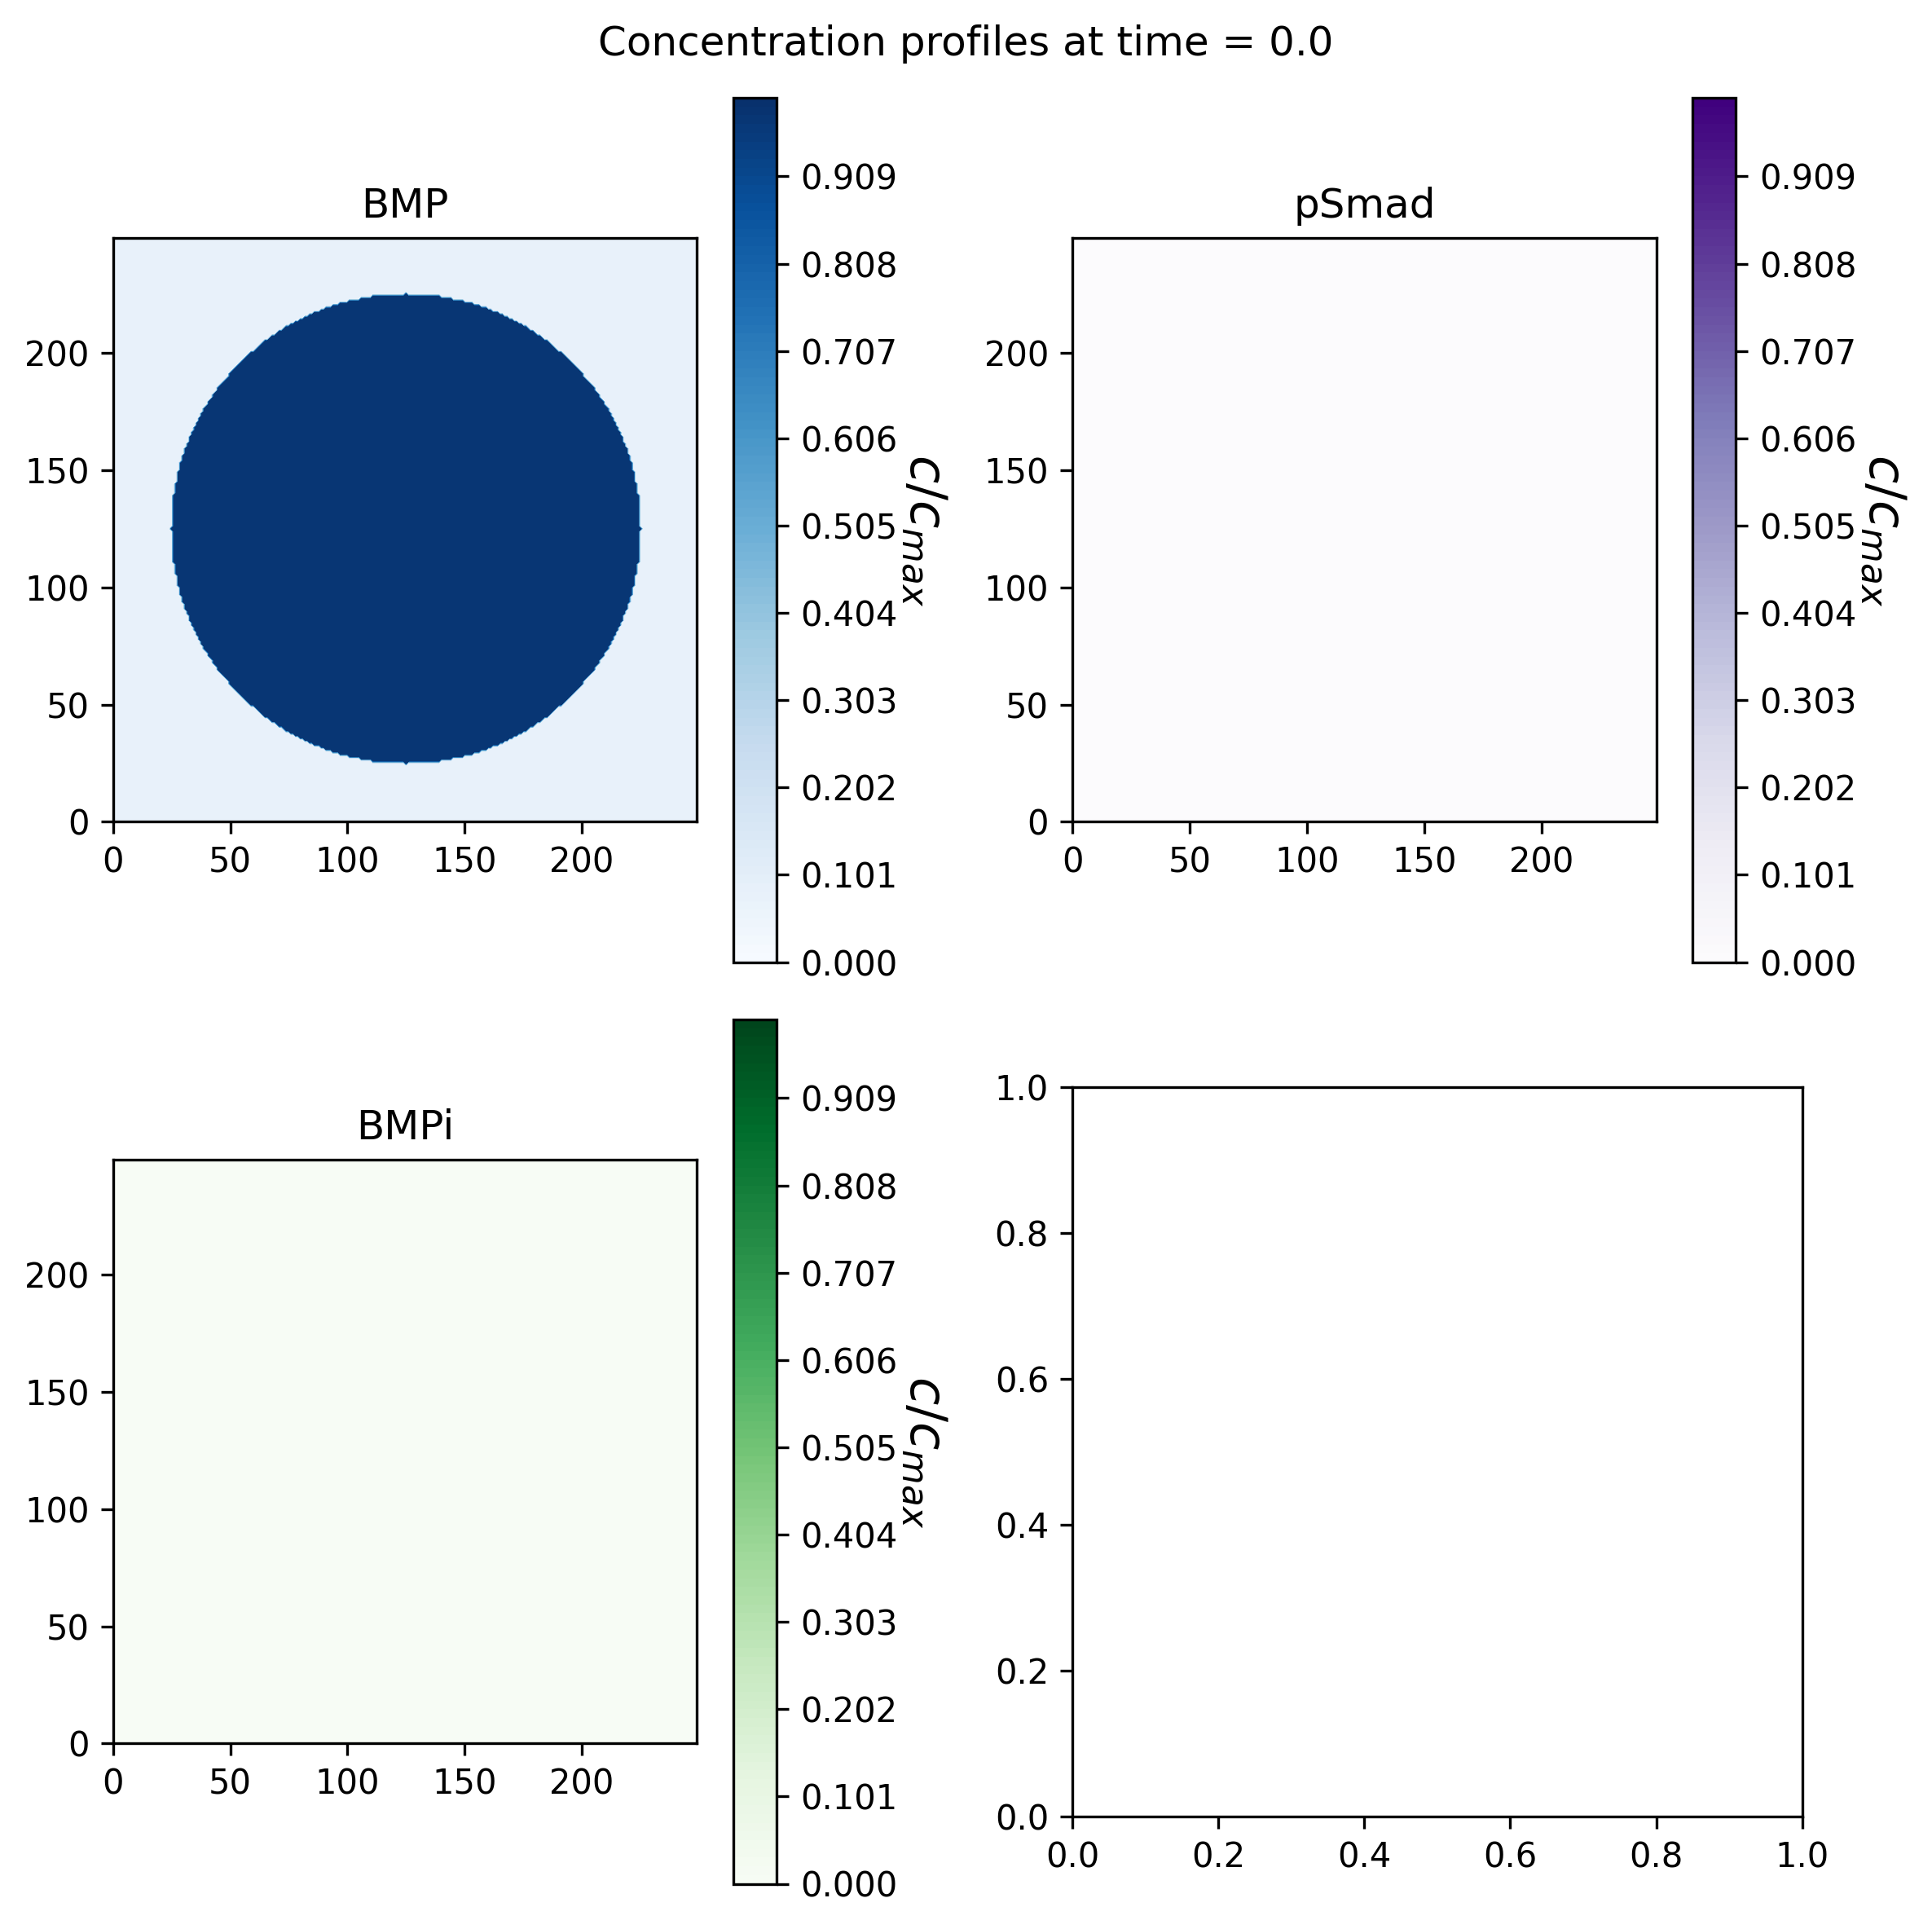

In [17]:
### Make movies for every species
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300, subplot_kw={"aspect":"equal"})
norm = matplotlib.colors.Normalize(vmin=0, vmax=1) 
level_boundaries = np.linspace(0.0, 1.0, 100)

cmap1 = plt.cm.Blues
cbar1 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap1),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[0,0]
    )
cbar1.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)

cmap2 = plt.cm.Greens
cbar2 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap2),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[1,0]
    )
cbar2.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)

cmap3 = plt.cm.Purples
cbar3 = fig.colorbar(
        ScalarMappable(norm=norm, cmap=cmap3),
        boundaries=level_boundaries,
        values=(level_boundaries[:-1] + level_boundaries[1:]) / 2,
        ax=axes[0,1]
    )
cbar3.ax.set_ylabel(r'$c/c_{max}$', rotation=270, fontsize = 15, labelpad=15)
fig.tight_layout()

# Plot for all times
for index in range(0, int(sol_params[5]/sol_params[6]), 10):

    BMP_max, BMP_min = np.max(data_b_time), np.min(data_b_time)
    img1 = data_b_time[index]/BMP_max
    cont1 = axes[0,0].contourf(X_indices, Y_indices, img1,
                               origin="lower", vmin=0.0, vmax=1.0, cmap=cmap1)
    axes[0,0].set_title("BMP")

    BMPi_max, BMPi_min = np.max(data_i_time), np.min(data_i_time)
    img2 = data_i_time[index]/BMPi_max
    cont2 = axes[1,0].contourf(X_indices, Y_indices, img2, 
                               origin="lower", vmin=0.0, vmax=1.0, cmap=cmap2)
    axes[1,0].set_title("BMPi")

    pSmad_max, pSmad_min = np.max(data_s_time), np.min(data_s_time)
    img3 = data_s_time[index]/pSmad_max
    cont3 = axes[0,1].contourf(X_indices, Y_indices, img3,
                               origin="lower",vmin=0.0, vmax=1.0, cmap=cmap3)
    axes[0,1].set_title("pSmad")

    plt.suptitle("Concentration profiles at time = {}".format(np.round(index*sol_params[0]*sol_params[6], 3)))
    fig.tight_layout()
    plt.savefig("NoGrowth/time_snaps/{}.jpeg".format(index), dpi=600)
    axes[0,0].clear()
    axes[0,1].clear()
    axes[1,0].clear()

plt.close();